15


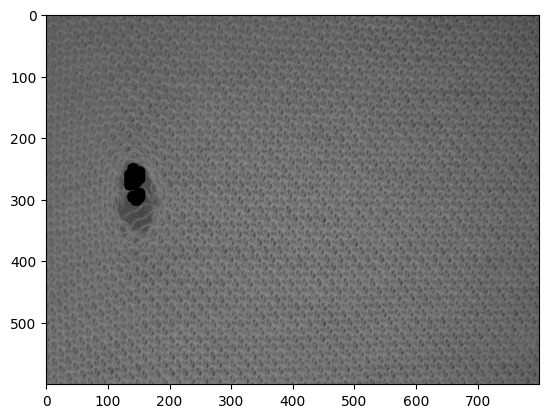

23


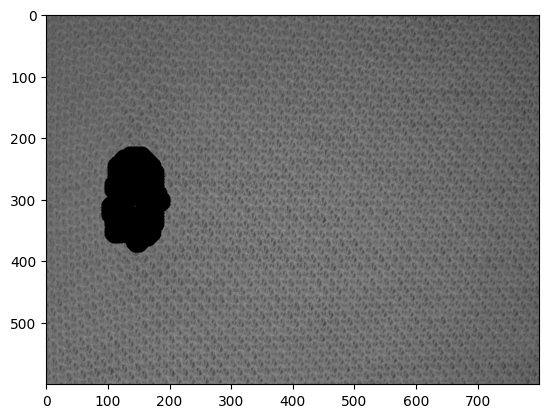

33


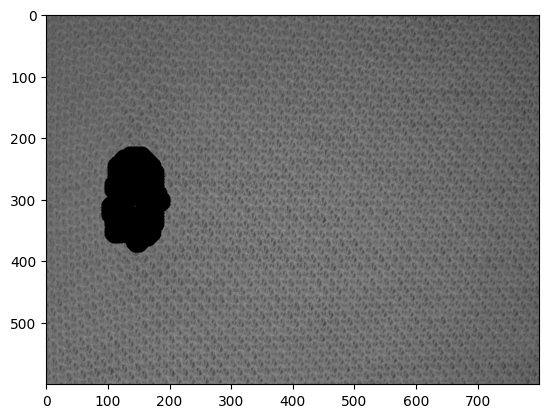

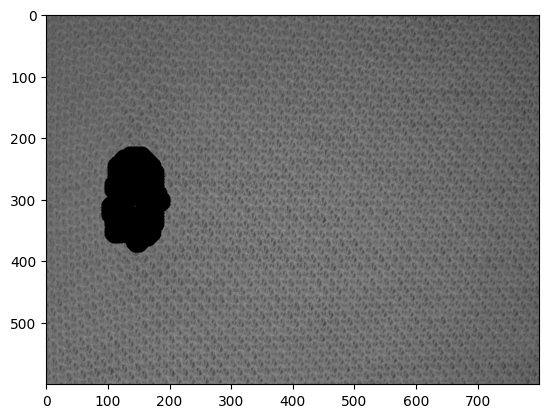

True

In [34]:
# combine three filter below

import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
import time

image = cv2.imread('./need/black/img154.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

min_size = 15
max_size = 33
#size_filter = 15
x, y = image.shape[:2]
#print(x,y)

new_img = image.copy()

offset = 5
x_filter = int((x)/offset)
y_filter = int((y)/offset)


for size_filter in range(min_size, max_size+1):

    if(size_filter == 15 or size_filter == 23 or size_filter == 33):
        print(size_filter)
        
        end_r = x - size_filter + offset
        end_c = y - size_filter + offset

        co_contrast = np.zeros((x_filter ,y_filter))
        co_homogeneity = np.zeros((x_filter ,y_filter))
        co_correlation = np.zeros((x_filter ,y_filter))

        for i in range(0, end_r, offset):
            for j in range(0, end_c, offset):
                f = image[ i : i + size_filter , j : j + size_filter ]
                result = graycomatrix( f, [1],[0] )
                co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
                co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
                co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))

        for i in range(0, x_filter):
            for j in range(0, y_filter):
                has_print = 0

                match size_filter:
                    case 15:
                        for k in range(0, 6):
                            if(has_print):
                                break

                            for l in range(0, 6):
                                if(new_img[i+k, j+l] == 0):
                                    has_print = 1
                                    break

                        if(not has_print):
                            if co_correlation[i,j] < 0.22:
                                if co_contrast[i,j] > 10:  
                                    if co_homogeneity[i,j] < 0.28:
                                        cv2.circle(new_img,( j*offset+6 , i*offset+6 ),10 ,0,-1)

                    case 23:
                        for k in range(0, 10):
                            if(has_print):
                                break

                            for l in range(0, 10):
                                if(new_img[i+k, j+l] == 0):
                                    has_print = 1
                                    break

                        if(not has_print):
                            if co_correlation[i,j] > 0.8079:
                                if co_contrast[i,j] > 35:
                                    if co_homogeneity[i,j] < 0.45:
                                        cv2.circle(new_img,( j*offset+8 , i*offset+8 ),19 ,0,-1)
                                    
                    case 33:
                        for k in range(0, 5):
                            if(has_print):
                                break

                            for l in range(0, 5):
                                if(new_img[i+k, j+l] == 0):
                                    has_print = 1
                                    break

                        if(not has_print):
                            if co_correlation[i,j] > 0.89:
                                cv2.circle(new_img,( j*offset+6 , i*offset+6 ),10 ,0,-1)

        plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB))
        plt.show()

        
        #print mean(no error)
        '''
        homogeneity_mean = np.mean(co_homogeneity)
        contrast_mean = np.mean(co_contrast)
        correlation_mean = np.mean(co_correlation)
        print("homogeneity mean: %f seconds" % homogeneity_mean)
        print("contrast mean: %f seconds" % contrast_mean)
        print("correlation mean: %f seconds" % correlation_mean)
        '''


image = cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB)
plt.imshow(image)
plt.show()
cv2.imwrite("./result.png", image)


In [ ]:
# filter 15, offset 5

import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

image = cv2.imread('./need/black/img154.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

new_img = image.copy()

size_filter = 15
x,y = image.shape[:2]
#print(x,y)

offset = 5
x_filter = int((x)/offset)
y_filter = int((y)/offset)

co_contrast = np.zeros((x_filter ,y_filter))
co_homogeneity = np.zeros((x_filter ,y_filter))
co_correlation = np.zeros((x_filter ,y_filter))

end_r = x - size_filter + offset
end_c = y - size_filter + offset

for i in range(0, end_r, offset):
    for j in range(0, end_c, offset):
        f = image[ i : i + size_filter , j : j + size_filter ]
        result = graycomatrix( f, [1],[0] )
        co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
        co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
        co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))


#print mean(no error)
'''
homogeneity_mean = np.mean(co_homogeneity)
contrast_mean = np.mean(co_contrast)
correlation_mean = np.mean(co_correlation)
print("homogeneity mean: %f seconds" % homogeneity_mean)
print("contrast mean: %f seconds" % contrast_mean)
print("correlation mean: %f seconds" % correlation_mean)
'''

for i in range(x_filter):
    for j in range(y_filter):
        has_print = 0

        for x in range(5):
            if(has_print):
                break

            for y in range(5):
                if(new_img[i+x, j+y] == 0):
                    has_print = 1
                    break

        if(not has_print):
            if co_correlation[i,j] < 0.1955023234021762:
                if co_contrast[i,j] > 10:  
                    if co_homogeneity[i,j] < 0.28:
                        cv2.circle(new_img,( j*offset+6 , i*offset+6 ),10 ,0,-1)

image = cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB)
plt.imshow(image)
plt.show()
#cv2.imwrite("./result.png", image)


45 26 0.8218202034366051 70.08102766798419 0.17617602755723302
45 27 0.839080684813468 62.94268774703556 0.18413266162672592
45 28 0.8419666690578799 58.12252964426877 0.18805869977520334
45 29 0.8275477779968676 55.76679841897232 0.1800319511700062
46 24 0.8198799749107697 81.73320158102766 0.14282293239135613
46 25 0.8202697340444429 85.12252964426878 0.15078819215856765
46 26 0.8377187280915439 76.73320158102767 0.16691947785537184
46 27 0.8575047028415054 70.28853754940711 0.16495887398633796
46 28 0.8832226668396657 60.158102766798415 0.17460696314505722
46 29 0.8841886806065804 58.31422924901185 0.16689527889443637
46 30 0.8469990427807826 64.59288537549408 0.15252818730875997
47 24 0.8202847545389929 83.14426877470355 0.14884045180831385
47 25 0.8214608938153265 83.57509881422924 0.1663295729071509
47 26 0.8443736378650113 74.31422924901185 0.17250407931086092
47 27 0.8629354696416012 70.14426877470356 0.17495918424974666
47 28 0.8982397226969722 59.233201581027664 0.19103820609

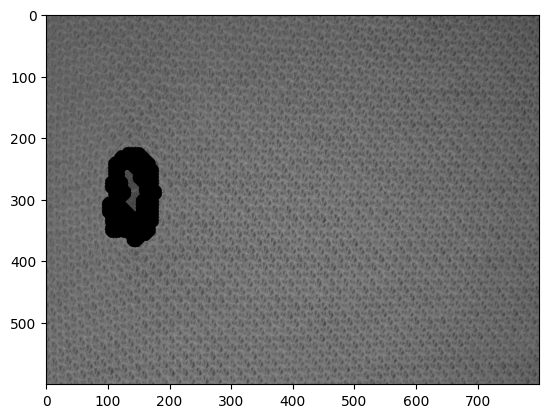

In [1]:
# filter 23, offest 5

import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

image = cv2.imread('./need/black/img154.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

new_img = image.copy()

size_filter = 23
x,y = image.shape[:2]
#print(x,y)

offset = 5
x_filter = int((x)/offset)
y_filter = int((y)/offset)

co_contrast = np.zeros((x_filter ,y_filter))
co_homogeneity = np.zeros((x_filter ,y_filter))
co_correlation = np.zeros((x_filter ,y_filter))

end_r = x - size_filter + offset
end_c = y - size_filter + offset

for i in range(0, end_r, offset):
    for j in range(0, end_c, offset):
        f = image[ i : i + size_filter , j : j + size_filter ]
        result = graycomatrix( f, [1],[0] )
        co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
        co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
        co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))


#print mean(no error)
'''
homogeneity_mean = np.mean(co_homogeneity)
contrast_mean = np.mean(co_contrast)
correlation_mean = np.mean(co_correlation)
print("homogeneity mean: %f seconds" % homogeneity_mean)
print("contrast mean: %f seconds" % contrast_mean)
print("correlation mean: %f seconds" % correlation_mean)
'''

for i in range(x_filter):
    for j in range(y_filter):
        has_print = 0

        for k in range(0, 7):
            if(has_print):
                break

            for l in range(0, 7):
                if(new_img[i+k, j+l] == 0):
                    has_print = 1
                    break

        if(not has_print):
            if co_correlation[i,j] > 0.809:
                if co_contrast[i,j] > 35:
                    if co_homogeneity[i,j] < 0.31:
                        cv2.circle(new_img,( j*offset+4 , i*offset+4 ),14 ,0,-1)
                        #print(i, j, co_correlation[i, j], co_contrast[i, j], co_homogeneity[i, j])
                        
image = cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB)
plt.imshow(image)
plt.show()
#cv2.imwrite("./result.png", image)


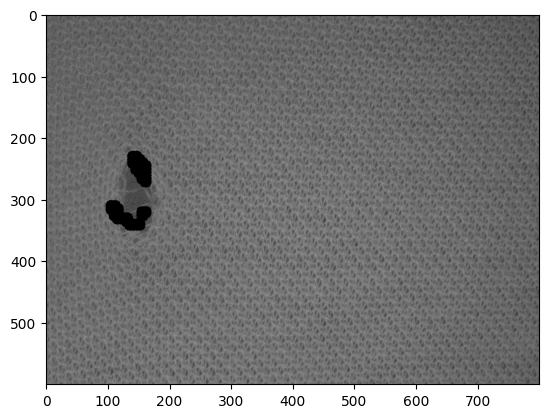

In [3]:
# filter 33, offset 5

import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops

image = cv2.imread('./need/black/img154.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

new_img = image.copy()

size_filter = 33
x,y = image.shape[:2]
#print(x,y)

offset = 5
x_filter = int((x)/offset)
y_filter = int((y)/offset)

co_contrast = np.zeros((x_filter ,y_filter))
co_homogeneity = np.zeros((x_filter ,y_filter))
co_correlation = np.zeros((x_filter ,y_filter))

end_r = x - size_filter + offset
end_c = y - size_filter + offset

for i in range(0, end_r, offset):
    for j in range(0, end_c, offset):
        f = image[ i : i + size_filter , j : j + size_filter ]
        result = graycomatrix( f, [1],[0] )
        co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
        co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
        co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))


#print mean(no error)
'''
homogeneity_mean = np.mean(co_homogeneity)
contrast_mean = np.mean(co_contrast)
correlation_mean = np.mean(co_correlation)
print("homogeneity mean: %f seconds" % homogeneity_mean)
print("contrast mean: %f seconds" % contrast_mean)
print("correlation mean: %f seconds" % correlation_mean)
'''

for i in range(x_filter):
    for j in range(y_filter):
        has_print = 0

        for x in range(2):
            if(has_print):
                break

            for y in range(2):
                if(new_img[i+x, j+y] == 0):
                    has_print = 1
                    break

        if(not has_print):
            if co_correlation[i,j] > 0.89:
                cv2.circle(new_img,( j*offset+6 , i*offset+6 ),10 ,0,-1)
                        
image = cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB)
plt.imshow(image)
plt.show()
#cv2.imwrite("./result.png", image)


15


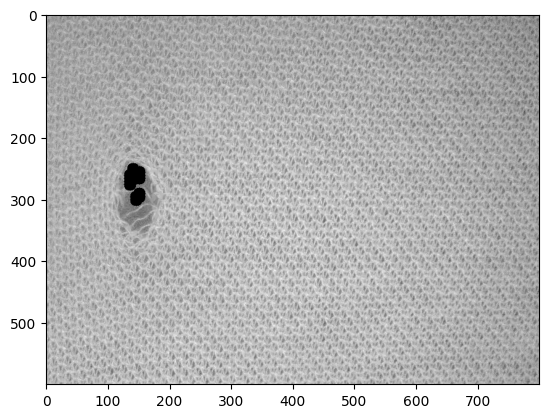

23


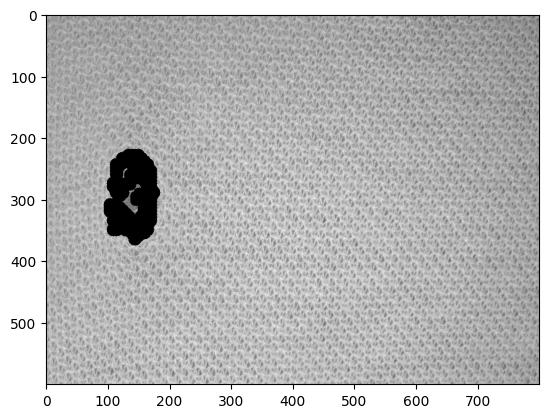

33


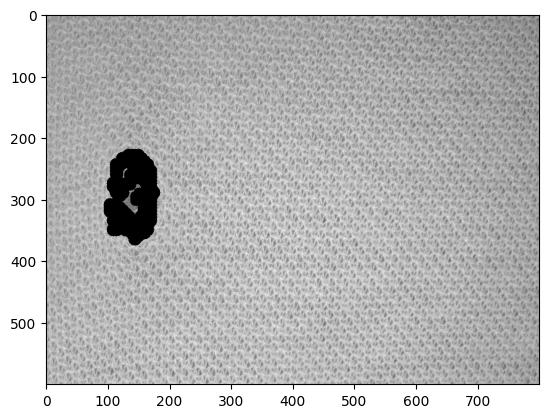

17


KeyboardInterrupt: 

In [9]:
# combine three filter above and the line other person code

import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
import time

image = cv2.imread('./need/black/img154.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#size_filter = 15
x, y = image.shape[:2]
#print(x,y)

new_img = image.copy()

offset = 5
x_filter = int((x)/offset)
y_filter = int((y)/offset)


def lot_filter(size_filter, g):
    print(size_filter)
    
    end_r = x - size_filter + offset
    end_c = y - size_filter + offset

    co_contrast = np.zeros((x_filter ,y_filter))
    co_homogeneity = np.zeros((x_filter ,y_filter))
    co_correlation = np.zeros((x_filter ,y_filter))

    for i in range(0, end_r, offset):
        for j in range(0, end_c, offset):
            f = image[ i : i + size_filter , j : j + size_filter ]
            result = graycomatrix( f, [1],[0] )
            co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
            co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
            co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))

    for i in range(0, x_filter):
        for j in range(0, y_filter):
            # detection is there already had cover around 
            has_print = 0
            # count there already had cover around yet
            # to judge the filter size 17 should it be cover the loss from above filter
            temp = 0

            match size_filter:
                # initial detection
                # test by img154 from texture_video
                case 15:
                    if co_correlation[i,j] < 0.22:
                        if co_contrast[i,j] > 10:  
                            if co_homogeneity[i,j] < 0.28:
                                cv2.circle(g,( j*offset+6 , i*offset+6 ),10 ,0,-1)

                # detection the hole edge 
                # test by image2 and img154 from texture_video
                case 23:
                    if(i*offset+4+4 < x and j*offset+4+4 < y):
                        for k in range(0, 5):
                            if(has_print):
                                break

                            for l in range(0, 5):
                                if(not 3<=k and not k<=5 and not 3<=l and not l<=5):
                                    if(g[i*offset+4+k, j*offset+4+l] == 0):
                                        has_print = 1
                                        break

                    if(not has_print):
                        if co_correlation[i,j] > 0.809:
                            if co_contrast[i,j] > 35:
                                if co_homogeneity[i,j] < 0.31:
                                    cv2.circle(new_img,( j*offset+4 , i*offset+4 ),11 ,0,-1)
                                
                # detection the loss those filter size 23 didn't cover 
                # test by img154 and img172 from texture_video
                case 33:
                    if(i*offset+7 < x and j*offset+7 < y):
                        for k in range(0, 8):
                            if(has_print):
                                break

                            for l in range(0, 8):
                                # skip the pixel nearby center of circle
                                if(not 2<=k and not k<=6 and not 2<=l and not l<=6):
                                    if(g[i*offset+k, j*offset+l] == 0):
                                        has_print = 1
                                        break

                    if(not has_print):
                        if co_correlation[i,j] > 0.89:
                            cv2.circle(g,( j*offset+4 , i*offset+4 ),11 ,0,-1)

                # detection the line by image1
                case 17:
                    if(i*offset-8+10 < x and j*offset-8+10 < y):
                        for k in range(0, 11):
                            for l in range(0, 11):
                                if(g[i*offset-8+k, j*offset-8+l] == 0):
                                    has_print = 1

                    if(not has_print):
                        if co_correlation[i,j] > 0.744:
                            if co_contrast[i,j] > 20:
                                if co_homogeneity[i,j] < 0.4:
                                    cv2.rectangle(g,( j*offset-6 , i*offset-6 ),( j*offset+12 , i*offset+12 ) ,0,-1)

                # detection the loss those filter size 17 didn't cover
                case 22:
                    if(i*offset-5+10 < x and j*offset-5+10 < y):
                        for k in range(0, 11):
                            for l in range(0, 11):
                                if(g[i*offset-5+k, j*offset-5+l] == 0):
                                    has_print = 1

                    if(not has_print):
                        if co_correlation[i,j] > 0.72:
                            if co_contrast[i,j] > 25:
                                if co_homogeneity[i,j] < 0.3:
                                    cv2.rectangle(g,( j*offset-5 , i*offset-5 ),( j*offset+10 , i*offset+10 ) ,0,-1)

    plt.imshow(g, cmap='gray')
    plt.show()

    return g

new_img = lot_filter(15, new_img)
new_img = lot_filter(23, new_img)
new_img = lot_filter(33, new_img)
new_img = lot_filter(17, new_img)
new_img = lot_filter(22, new_img)

for i in range(x):
    for j in range(y):
        if(new_img[i,j] > 0):
            new_img[i,j] = 255

print("final")
plt.imshow(new_img, cmap='gray')
plt.show()
cv2.imwrite("./result.png", new_img)


15


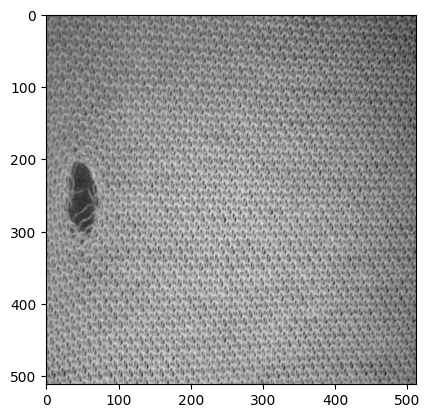

23


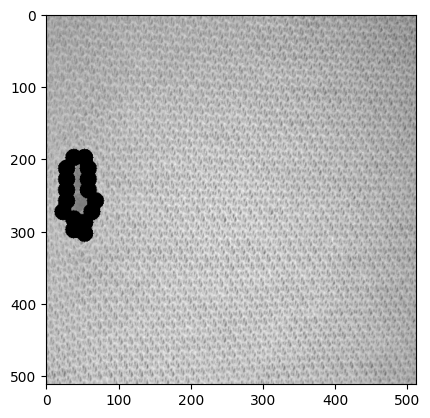

33


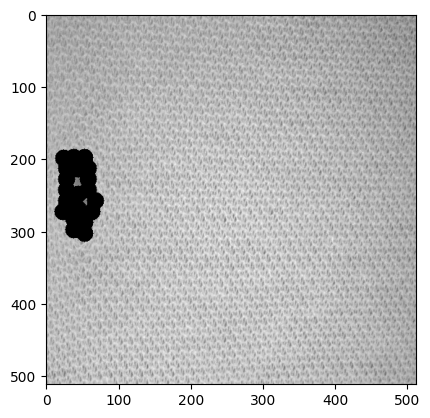

17


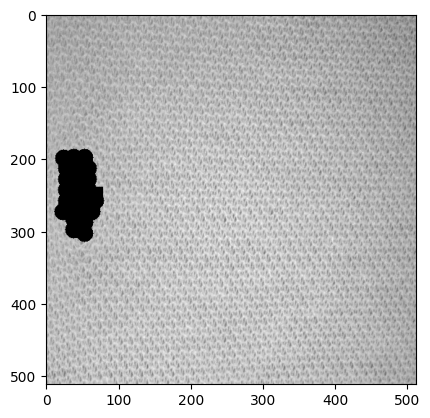

40


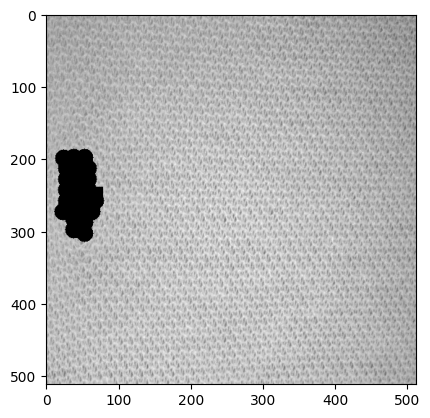

{15: 0, 23: 16, 33: 4}
final


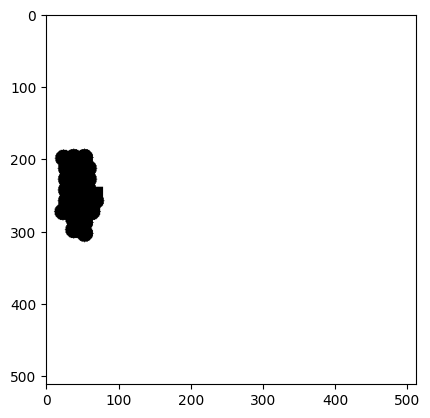

In [1]:
# final (test image2)

import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
import time

image = cv2.imread('image2.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#size_filter = 15
x, y = image.shape[:2]
#print(x,y)

new_img = image.copy()


def lot_filter(size_filter, g, offset, count):
    print(size_filter)
    
    x_filter = int((x)/offset)
    y_filter = int((y)/offset)

    end_r = x - size_filter + offset
    end_c = y - size_filter + offset

    co_contrast = np.zeros((x_filter ,y_filter))
    co_homogeneity = np.zeros((x_filter ,y_filter))
    co_correlation = np.zeros((x_filter ,y_filter))

    for i in range(0, end_r, offset):
        for j in range(0, end_c, offset):
            f = image[ i : i + size_filter , j : j + size_filter ]
            result = graycomatrix( f, [1],[0] )
            co_contrast[int(i/offset),int(j/offset)] = float(graycoprops(result, 'contrast'))
            co_homogeneity[int(i/offset),int(j/offset)] = float(graycoprops(result, 'homogeneity'))
            co_correlation[int(i/offset),int(j/offset)] = float(graycoprops(result, 'correlation'))

    for i in range(0, x_filter):
        for j in range(0, y_filter):
            # Detect is there already had cover around 
            has_print = 0
            # Count there already had cover around yet
            # To judge the filter size 17 should it be cover the loss from above filter
            temp = 0

            match size_filter:
                # initial detection
                # test by img154 from texture_video
                case 15:
                    if co_correlation[i,j] < 0.1955023234021762:
                            if co_contrast[i,j] > 10:  
                                if co_homogeneity[i,j] < 0.28:
                                    cv2.circle(g,( j*offset+6 , i*offset+6 ),10 ,0,-1)
                                    count[15]+=1

                # Detect the hole edge 
                # Test by image2 and img154 from texture_video
                case 23:
                    if co_correlation[i,j] > 0.809:
                        if co_contrast[i,j] > 35:
                            if co_homogeneity[i,j] < 0.31:
                                if(count[15] > 15):
                                    for k in range(0, 10):
                                        if(has_print):
                                            break

                                        for l in range(0, 10):
                                            if(new_img[i+k, j+l] == 0):
                                                has_print = 1
                                                break

                                    if(not has_print):
                                        if co_correlation[i,j] > 0.8079:
                                            if co_contrast[i,j] > 35:
                                                if co_homogeneity[i,j] < 0.45:
                                                    cv2.circle(new_img,( j*offset+8 , i*offset+8 ),21 ,0,-1)

                                else:
                                    for k in range(0, 7):
                                        if(has_print):
                                            break

                                        for l in range(0, 7):
                                            # skip the pixel nearby center of circle
                                            if(not k==3 and not l==3):
                                                if(i*offset+5+k < x and j*offset+5+l < y):
                                                    if(g[i*offset+5+k, j*offset+5+l] == 0):
                                                        has_print = 1
                                                        break

                                if(not has_print):
                                    cv2.circle(g,( j*offset+8 , i*offset+8 ), 12 , 0, -1)
                                    count[23]+=1
                                
                # Detect the loss those filter size 23 didn't cover 
                # Test by img154 and img172 from texture_video
                case 33:
                    if co_correlation[i,j] > 0.89:
                        for k in range(0, 7):
                            if(has_print):
                                break

                            for l in range(0, 7):
                                # skip the pixel nearby center of circle
                                if(not(3<=k<=5 and not 3<=l<=5)):
                                    if(i*offset+k < x and j*offset+l < y):
                                        if(g[i*offset+k, j*offset+l] == 0):
                                            has_print = 1
                                            break

                        if(not has_print):
                            cv2.circle(g,( j*offset+4 , i*offset+4 ), 12 , 0, -1)
                            count[33]+=1

                # Detect the line
                # Test by image1
                case 17:
                    if co_correlation[i,j] > 0.744:
                        if co_contrast[i,j] > 20:
                            if co_homogeneity[i,j] < 0.4:
                                for k in range(-2, 10):
                                    if(has_print):
                                        break

                                    for l in range(-2, 10):
                                        if(not (-1<=k<=8 and -1<=l<=8)):
                                            if(i*offset+k < x and j*offset+l < y):
                                                if(g[i*offset+k, j*offset+l] == 0):
                                                    has_print = 1
                                                    temp+=1

                                if(temp < 9):
                                    has_print = 0

                                if(not has_print):
                                    cv2.rectangle(g,( j*offset-6 , i*offset-6 ),( j*offset+13 , i*offset+13 ) , 0, -1)

                # Detect the loss those filter size 17 didn't cover
                case 22:
                    if co_correlation[i,j] > 0.72:
                        if co_contrast[i,j] > 25:
                            if co_homogeneity[i,j] < 0.3:
                                for k in range(8, 10):
                                    if(has_print):
                                        break

                                    for l in range(8, 10):
                                        if(i*offset-5+k < x and j*offset-5+l < y):
                                            if(not (k==9 and l==9)):
                                                if(g[i*offset-5+k, j*offset-5+l] == 0):
                                                    has_print = 1

                                if(not has_print):
                                    cv2.rectangle(g,( j*offset-5 , i*offset-5 ),( j*offset+13 , i*offset+13 ) , 0, -1)

                # Detect the line
                # Test by img313 from texture_video
                case 40:
                    if 0.8099011884285607 < co_correlation[i,j]:
                        if 25.976282051282055 < co_contrast[i,j]:
                            if co_homogeneity[i,j] < 0.32:
                                for l in range(10, 19):
                                    if(has_print):
                                        break

                                    for k in range(10, 19):
                                        if(i*offset+l < x and j*offset+k < y):
                                            if(not(13<=k<=15 and 13<=l<=15)):
                                                if(g[i*offset+l][j*offset+k] == 0):
                                                    has_print = 1
                                                    break

                                if(not has_print):
                                    cv2.rectangle(g,( j*offset , i*offset ),( j*offset+28 , i*offset+28 ) , 0, -1)

    plt.imshow(g, cmap='gray')
    plt.show()

    return g, count

count = {15:0, 23: 0, 33:0}

new_img, count = lot_filter(15, new_img, 5, count)
new_img, count = lot_filter(23, new_img, 5, count)
new_img, count = lot_filter(33, new_img, 5, count)

# Because part of the line detection was written by another person, it is weak. 
# It will also detect the flawless ones, so it is restricted. 
# If the first three basically do not detect anything, it will be skipped.
if(25 > count[15] + count[23] + count[33] >0):
    new_img = lot_filter(17, new_img, 5, count)[0]

# Because filter 22 it seems useless, so skip
#new_img = lot_filter(22, new_img, 5)

new_img = lot_filter(40, new_img, 3, count)[0]

print(count)

for i in range(x):
    for j in range(y):
        if(new_img[i,j] > 0):
            new_img[i,j] = 255

print("final")
plt.imshow(new_img, cmap='gray')
plt.show()
#cv2.imwrite("./result.png", new_img)
